In [1]:
#!/usr/bin/env python
# coding: utf-8

In[71]:

In [2]:
import numpy as np
from numpy.linalg import inv
from numpy.random import rand, randn
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, invgamma
from scipy.special import gamma as Γ
from numpy import exp as e
from numpy import log as ln

 Generate the data

In [3]:
n = 20000
x = rand(n,1)
y = 3*x + 1 + 0.1*randn(n,1)  # solution w = [3,1]
X = np.hstack((x, np.ones((n,1))))

Plot the data

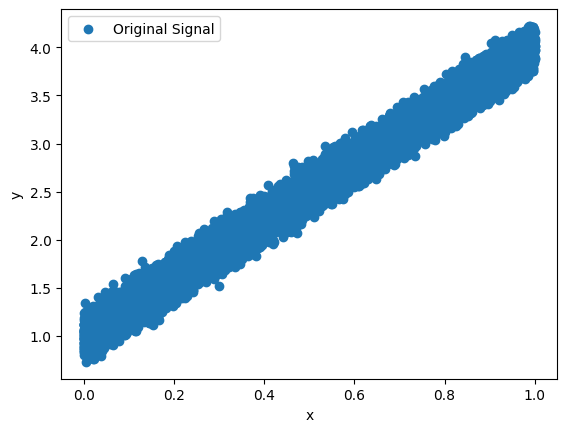

In [4]:
plt.scatter(x, y, label='Original Signal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In[72]:

In [5]:
μₒ = np.array([[0],[0]])
Σₒ = np.array([[1,0],[0,1]])
Λₒ = inv(Σₒ)
μ = inv(X.T.dot(X) + Λₒ).dot(X.T.dot(y) + Λₒ.dot(μₒ))
print(μ)

[[3.00132802]
 [0.99903083]]


In [6]:
Λ = X.T.dot(X) + Λₒ
Σ = inv(Λ)

In [7]:
s, t = np.random.multivariate_normal(μ.flatten(), Σ, 1000).T

Plot the points using a 2D histogram<br>
Notice how we have a Gaussian distribution centered around 2.96 and 1.02

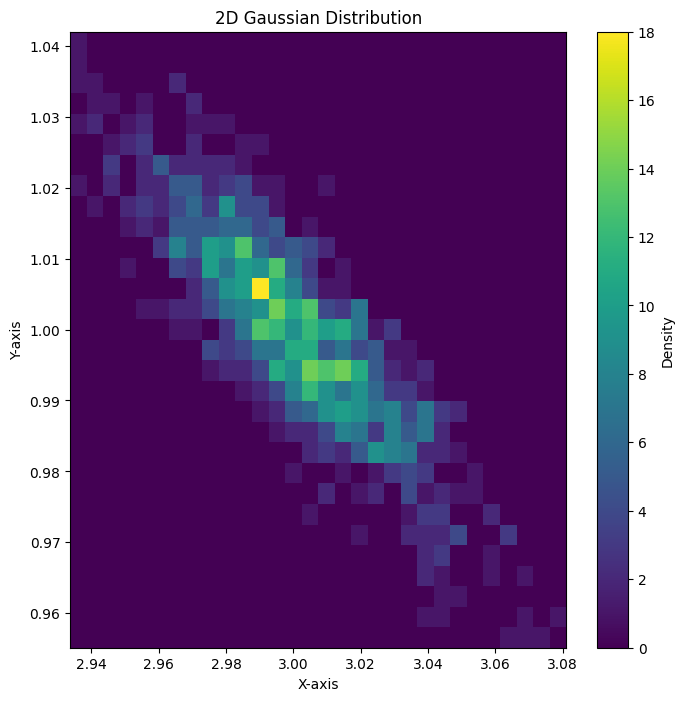

In [8]:
plt.figure(figsize=(8, 8))
plt.hist2d(s, t, bins=30, cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Gaussian Distribution')
plt.show()

In[73]:

Let's now draw the Gaussian distribution in 3d space<br>
Notice that the solution is centered around 

In [9]:
grid_size = 100
ẋ = np.linspace(0, 4, grid_size)
ỳ = np.linspace(0, 4, grid_size)
 
Ẍ, Ŷ = np.meshgrid(ẋ, ỳ)
pos = np.dstack((Ẍ, Ŷ))

Create the Gaussian distribution

In [10]:
rv = multivariate_normal(μ.flatten(), Σ)
Z = rv.pdf(pos)

Plot the 3D mesh

In [11]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Ẍ, Ŷ, Z, cmap='viridis', edgecolor='none')

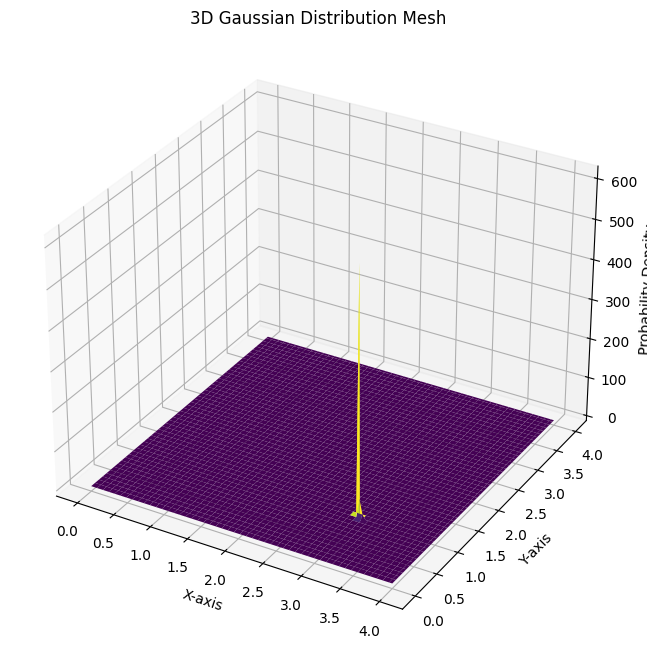

In [12]:
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Probability Density')
ax.set_title('3D Gaussian Distribution Mesh')
plt.show()

In[82]:

In [13]:
a = 1
b = 1
α = n/2 + a
β = y.T.dot(y)/2 + b + μₒ.T.dot(Λₒ).dot(μₒ)/2 - μ.T.dot(Λ).dot(μ)/2

In [14]:
xr = np.reshape(np.linspace(0.007,0.013,100), (100,1))
yr = invgamma.pdf(xr, a=α, scale=β)

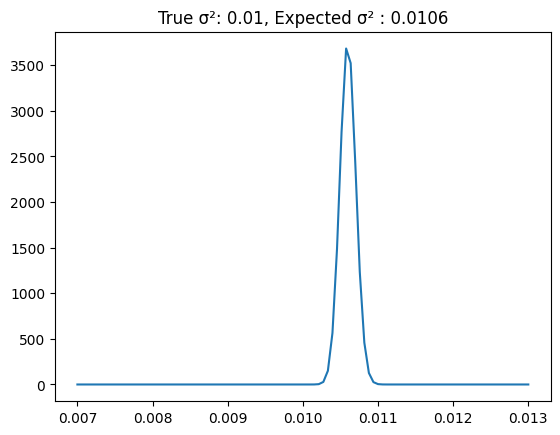

In [15]:
plt.plot(xr, yr)
plt.title('True σ²: 0.01, Expected σ² : %.4f'% (β/(α-1)))
plt.show()

In[ ]: